# AIM: To create a AI model to predict the Class (OLD, MIDDLE, YOUNG) age of the actors. 

## Requirments:
### > Python
### > Libraries of numpy, pandas, matplotlib, opencv, OS
### > Idea of Deep Learning 
### > Tensorflow, Keras, Layers

About Project
We have a collection of 19906 classified images of actors which are classified into categories (MIDDLE, OLD ,YOUNG) in a csv file.
We have a collection of 6636 unlabeled images of actors which we have to predict.

We train the model on labeled images to predict the unlabeled images.

In [1]:
import numpy as np #to manipulate data in array form
import pandas as pd #to manipulate the data in dataset
import matplotlib.pyplot as plt #for data visualization
%matplotlib inline 
import cv2 #to process the image
import os #to handle the operating system data

# NUMPY
### NumPy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays.NumPy’s main object is the homogeneous multidimensional array.It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers.In NumPy dimensions are called axes. The number of axes is rank.NumPy’s array class is called ndarray. It is also known by the alias array.

# PANDAS 
### Pandas is quite a game changer when it comes to analyzing data with Python and it is one of the most preferred and widely used tools in data munging/wrangling.
### > Convert a Python’s list, dictionary or Numpy array to a Pandas data frame
### > Open a local file using Pandas, usually a CSV file, but could also be a delimited text file (like TSV), Excel, etc
###  >Open a remote file or database like a CSV or a JSONon a website through a URL or read from a SQL table/database


# Keras
### Keras contains numerous implementations of commonly used neural-network building blocks such as layers, objectives, activation functions, optimizers, and a host of tools to make working with image and text data easier to simplify the coding necessary for writing deep neural network code.

# Matplotlib
### Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. Matplotlib. pyplot is a plotting library used for 2D graphics in python programming language. It can be used in python scripts, shell, web application servers and other graphical user interface toolkits. There are several toolkits which are available that extend python matplotlib functionality.

In [2]:
setdata=pd.read_csv(r"C:\Users\SUKUN\Downloads\analyticsVidhyaComp\train_DETg9GD\train.csv")
setdata[:10]
#here the setdata is the csv file that consist the data that will be used for training and validation
#setdata contains two columns ID, CLASS where ID is the name of the image of the actors.
# CLASS is the category of age of that actor

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


When we see the dataset column Class , we see that there are 3 categories and not even in the form of 0 and 1.
So we need to Put the Categories in 0 and 1 format for all 3 categories.
So we use Label Encoder

In [3]:
from sklearn.preprocessing import LabelEncoder #convert named categories into numbers
le=LabelEncoder() #we take le as label encoder 
setdata["Class"]=le.fit_transform(setdata["Class"]) # fit_transform transforms all the categories into unique values

# Here we divide data in features and target
**the class (categories) are the target**
**the img is the feature in this case.**
**So we read each image with opencv and change it to array of dimension 80,80,3  where 3 is color RED, GREEN , BLUE**

In [4]:
path=("C:/Users/SUKUN/Downloads/analyticsVidhyaComp/train_DETg9GD/Train/") #it is the address of the folder which contains all
#the images
dataX=[]
dataY=[]
for i in range(len(setdata["ID"])): #taking the numbers of the image name loop by loop
    k=setdata["ID"][i]
    b=cv2.imread(os.path.join(path+k))
    #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    b_new=cv2.resize(b,(80,80))
    dataX.append(b_new)

In [5]:
dataY=setdata["Class"] # putting all the values of labeled target in dataY

In [6]:
split=15000

In [7]:
X_test= dataX[split:] # features for validation 
X_train=dataX[:split]# features for training
Y_test=dataY[split:] # target of validation 
Y_train=dataY[:split]# target for training 

In [8]:
Y_train # as we see the Y_train i.e target is a value of (0,1,2) = (MIDDLE, OLD, YOUNG)

0        0
1        2
2        0
3        2
4        0
5        0
6        2
7        2
8        2
9        1
10       2
11       0
12       0
13       0
14       0
15       0
16       1
17       2
18       1
19       0
20       2
21       1
22       2
23       0
24       0
25       2
26       0
27       1
28       0
29       2
        ..
14970    1
14971    0
14972    1
14973    0
14974    1
14975    2
14976    2
14977    2
14978    0
14979    2
14980    2
14981    2
14982    2
14983    0
14984    1
14985    2
14986    2
14987    2
14988    2
14989    0
14990    2
14991    0
14992    0
14993    1
14994    0
14995    2
14996    0
14997    2
14998    0
14999    2
Name: Class, Length: 15000, dtype: int32

In [9]:
X_train=np.array(X_train) # changing from list to array
X_train.shape # shape of the training set

(15000, 80, 80, 3)

In [10]:
X_test=np.array(X_test) # changing from list to array
X_test.shape # shape of the validation data 

(4906, 80, 80, 3)

In [11]:
Y_train.shape # shape of training target data

(15000,)

In [12]:
X_train[0].shape # shape of training is essential as it is the input to deep learning model 

(80, 80, 3)

In [13]:
X_train=X_train/255.0 # dividing from 255.0 to get all values from 0 to 1
X_test=X_test/255.0

In [109]:
# plot
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = (setdata, y_pos)
data.hist()
plt.show()

AttributeError: 'tuple' object has no attribute 'hist'

In [14]:
leap=[]
# we take all the values of the target 
for i in setdata["Class"]: 
    # and put it all in leap named list
    leap.append(i)
# we count each categories occurance in the leap list
middle=leap.count(0)
old=leap.count(1)
young=leap.count(2)

In [105]:
# we name all the categories in y_pos to mark y-axis
y_pos=["middle","old","young"]
# nums is a list that contains all the count values of the categories
nums=[middle,old,young]

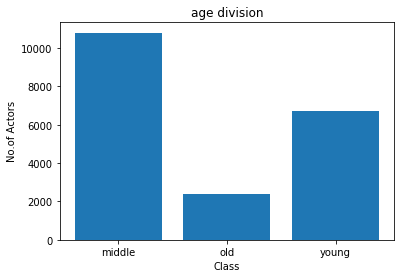

In [16]:
# here we create a bar graph to know the no. of actors in dataset of the particular category
plt.bar(y_pos, nums) # creating bar graph between count values and categories name 
plt.ylabel('No.of Actors') # name of y-axis 
plt.xlabel('Class') # name of x-axis
plt.title('age division') # heading of the plot
 
plt.show() # create the plot according to the data provided 

# Recap 1

In [24]:
import tensorflow as tf # calling tensorflow " deep learning library"
from keras.models import Sequential # Sequential create a ordered layer by layer deep learning model
from keras.layers import Dense, Dropout # Dense is a fully connected layer  
# Dropout is the layer which reduces the overfitting by not not taking the output of few nodes

In [17]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input
input_tensor = Input(shape=(80, 80, 3))  # this assumes K.image_data_format() == 'channels_last'

model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)

Using TensorFlow backend.


In [19]:
model.summary() # it shows each layer of the pre trained model in order

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 80, 80, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 39, 39, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 39, 39, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 39, 39, 32)   0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [20]:
model.fit(X_train, Y_train, batch_size=100, epochs=20)
# training pre trained model with image data so that model can analysis the features in train data

Epoch 1/20
15000/15000 [==============================] - 1031s 69ms/step - loss: 1.0236 - accuracy: 0.6545
Epoch 2/20
15000/15000 [==============================] - 676s 45ms/step - loss: 0.5425 - accuracy: 0.7715
Epoch 3/20
15000/15000 [==============================] - 611s 41ms/step - loss: 0.4009 - accuracy: 0.8395
Epoch 4/20
15000/15000 [==============================] - 631s 42ms/step - loss: 0.3105 - accuracy: 0.8794
Epoch 5/20
15000/15000 [==============================] - 637s 42ms/step - loss: 0.2548 - accuracy: 0.9033
Epoch 6/20
15000/15000 [==============================] - 624s 42ms/step - loss: 0.1975 - accuracy: 0.9271
Epoch 7/20
15000/15000 [==============================] - 617s 41ms/step - loss: 0.1888 - accuracy: 0.9311
Epoch 8/20
15000/15000 [==============================] - 624s 42ms/step - loss: 0.1525 - accuracy: 0.9450
Epoch 9/20
15000/15000 [==============================] - 626s 42ms/step - loss: 0.1371 - accuracy: 0.9499
Epoch 10/20
15000/15000 [===========

In [57]:
#after getting the features from training we predict the training data to be used to train the self model 
pred_train=model.predict(X_train)

In [58]:
# creating the model of sequential to train the training prediction of pre trained model
model1=Sequential() # creating the layer by layer model
# adding a fully connected layer with input_shape of pre trained output
model1.add(Dense(20, activation="relu", input_shape=(pred_train[0].shape))), 
# adding a fully connected layer with 20 nodes
model1.add(Dense(20, activation="relu")),     
# adding fully connected dense layer to classify into categories
model1.add(Dense(3, activation="softmax"))    

In [59]:
# loss here is used to classify output when their are more than 2 categories(3 in this case )
model1.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
# accuracy is no. of right prediction made and compile model metrics to adjust to increase it
# compile is  the parameter of what way we want to train our model

In [60]:
model1.summary()
# it shows each layer of the trained model in order

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                20020     
_________________________________________________________________
dense_9 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 63        
Total params: 20,503
Trainable params: 20,503
Non-trainable params: 0
_________________________________________________________________


In [94]:
# training the self created model between pre trained model (training) prediction and training results 
model1.fit(pred_train, Y_train, epochs=15, batch_size=100)
# epochs is the number of times each img data is gone through the model
# batch_size is amount of data send in model in one time

Epoch 1/15
15000/15000 [==============================] - ETA: 0s - loss: 0.1233 - accuracy: 0.9668 - ETA: 31s - loss: 0.12 - 7s 474us/step - loss: 0.1236 - accuracy: 0.9664
Epoch 2/15
15000/15000 [==============================] - 0s 26us/step - loss: 0.1223 - accuracy: 0.9667
Epoch 3/15
15000/15000 [==============================] - 0s 25us/step - loss: 0.1210 - accuracy: 0.9665
Epoch 4/15
15000/15000 [==============================] - 0s 21us/step - loss: 0.1201 - accuracy: 0.9673
Epoch 5/15
15000/15000 [==============================] - 0s 30us/step - loss: 0.1193 - accuracy: 0.9681
Epoch 6/15
15000/15000 [==============================] - 1s 42us/step - loss: 0.1179 - accuracy: 0.9682
Epoch 7/15
15000/15000 [==============================] - 0s 32us/step - loss: 0.1173 - accuracy: 0.9682
Epoch 8/15
15000/15000 [==============================] - 0s 31us/step - loss: 0.1163 - accuracy: 0.9685
Epoch 9/15
15000/15000 [==============================] - 0s 31us/step - loss: 0.1159 - acc

# Recap 2

In [100]:
# now time to check the accuracy of the untrained labeled data i.e X_text 
validate_pred1=model.predict(X_test) # predicting the X_test with pre trained model
final_validate=model1.predict(validate_pred1) # predicting the output of prediction of pre trained model
Y_pred_val=[]
for d in range(len(final_validate)): # taking all the values of final_validate
    actual_value=np.argmax(final_validate[d]) # changing final output of final_validate into one of the 3 category 

    Y_pred_val.append(actual_value) # putting the categories list of prediction in list name Y_pred_val

In [101]:
# to find accuracy we import a accuracy finding function
from sklearn.metrics import accuracy_score
# now we find the accuracy of our all models prediction with original values 
accuracy_score(Y_pred_val, Y_test)

0.8320423970648186

In [158]:
# we difine this function to check how good is our model
def image_side_verify(value): # takes a number as parameter
    plt.imshow(X_test[value]) # show the desired image from labeled un trained data
    print("model prediction: ",Y_pred_val[value]) # shows what the models predicted
    print("actual Category: ",Y_test[split+value]) # show what its actual answere was

model prediction:  YOUNG
actual Category:  2


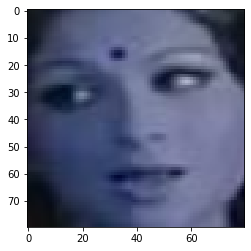

In [164]:
image_side_verify(78) 

In [65]:
# to save the model and reduce the further retraining time we import pickle 
import pickle
# with open a pikle file that is writable 
model_pkl=open("age_detect.pkl", "wb")
# now we put or dump all the data of model in it
pickle.dump(model, model_pkl)
# now we close and save this pkl file
model_pkl.close()

In [66]:
# we open that closed pickle file in the readable format
loading_pkl=open("age_detect.pkl","rb")
# we load the model to use it in a particular notebook 
pickle.load(loading_pkl)

In [150]:
def age_analysis(age_matrix):
    
    #creating bar graph to show the percentage of  every emotion
    # we create a bar graph that takes all the 3 categories, 
    # alpha is the distance between each bar
    plt.bar(y_pos, age_matrix, align='center', alpha=0.5)
    # sets the label of X-axis
    plt.xlabel("Categories")
    # sets the label for Y-axis
    plt.ylabel('confidence')
    # sets the title of the plot
    plt.title('Age_Classification')
    # initiate plotting 
    plt.show()

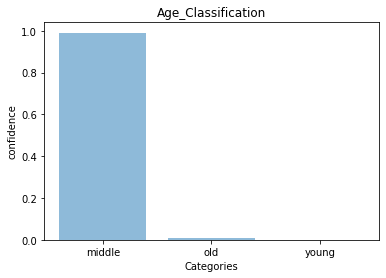

In [151]:
# calling this self defined function will show the confidence of being in each category
age_analysis(final_validate[3])

In [153]:
# since the final prediction we get is in categories (0,1,2)
# so we define a function that will change the categories in (MIDDLE, OLD ,YOUNG)
def decode_label(list_given): # we give the prediction list as the parameter in the function
    for u in range(len(list_given)): 
        # we take all the values of given list one by one 
        
        # we put all the value equal to 0 as MIDDLE
        if list_given[u]==0:
            list_given[u]='MIDDLE'
        # we put all the value equal to 0 as YOUNG
        elif list_given[u]==2:
            list_given[u]='YOUNG'
        # we put all the value equal to 0 as OLD
        elif list_given[u]==1:
            list_given[u]='OLD'
    # return the list with categories as (MIDDLE, YOUNG ,OLD)
    return list_given

In [152]:
# we change the final prediction inputs from (0,1,2) to (MIDDLE, OLD, YOUNG)  
decode_label(Y_pred_val)

['YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'OLD',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'OLD',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'OLD',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'OLD',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'OLD',
 'OLD',
 'MIDDLE',
 'OLD',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'OLD',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'OLD',
 'YOUNG',
 'YOUNG',
 'OLD',
 'OLD',
 'MIDDLE',
 'OLD',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDD

In [67]:
setdata1=pd.read_csv(r"C:\Users\SUKUN\Downloads\analyticsVidhyaComp\test_Bh8pGW3\test.csv")
path=("C:/Users/SUKUN/Downloads/analyticsVidhyaComp/test_Bh8pGW3/Test/")
X_unlabeled=[]

In [68]:
for i in range(len(setdata1["ID"])):
    k=setdata1["ID"][i]
    b=cv2.imread(os.path.join(path+k))
    b_new=cv2.resize(b,(80,80))
    X_unlabeled.append(b_new)

In [69]:
setdata1["ID"]

0       25321.jpg
1         989.jpg
2       19277.jpg
3       13093.jpg
4        5367.jpg
5       19851.jpg
6       10384.jpg
7       24567.jpg
8        2029.jpg
9        4956.jpg
10      26131.jpg
11      17407.jpg
12      11136.jpg
13      23038.jpg
14       6333.jpg
15      25076.jpg
16      22102.jpg
17      12396.jpg
18      24719.jpg
19      21354.jpg
20      15362.jpg
21      10415.jpg
22       5295.jpg
23       5531.jpg
24      16784.jpg
25      22442.jpg
26      16794.jpg
27      11261.jpg
28      11540.jpg
29      24286.jpg
          ...    
6606    13841.jpg
6607     8999.jpg
6608    15780.jpg
6609    10241.jpg
6610    13006.jpg
6611    20322.jpg
6612    24054.jpg
6613    21310.jpg
6614    24707.jpg
6615     3292.jpg
6616    18392.jpg
6617     7731.jpg
6618    26522.jpg
6619    25614.jpg
6620    11283.jpg
6621     1485.jpg
6622    15057.jpg
6623     9582.jpg
6624    10634.jpg
6625    15146.jpg
6626    16049.jpg
6627    13461.jpg
6628      147.jpg
6629    22636.jpg
6630     6

In [70]:
X_submit=np.array(X_unlabeled)

In [71]:
X_submit=X_submit/255.0

In [97]:
pred1_sub=model.predict(X_submit)
pred2=model1.predict(pred1_sub)

In [84]:
pred2[0]

array([0.9495755 , 0.04370593, 0.00671856], dtype=float32)

In [88]:
pred_final=[]
for j in range(len(pred2)):
    #print(np.argmax(pred1[j]))
    pred_final.append(np.argmax(pred2[j]))

In [89]:
def decode_label(list_given):
    for u in range(len(list_given)):
        if list_given[u]==0:
            list_given[u]='MIDDLE'
        elif list_given[u]==2:
            list_given[u]='YOUNG'
        elif list_given[u]==1:
            list_given[u]='OLD'
    return list_given

In [90]:
decode_label(pred_final)

['MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'OLD',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'OLD',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'OLD',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'OLD',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'OLD',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'OLD',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',


In [91]:
test=pd.DataFrame()

In [92]:
len(pred_final)

6636

In [93]:
test["ID"]=setdata1["ID"]
test["Class"] = pred_final
test.to_csv("submission_work.csv", index=False)